<a href="https://colab.research.google.com/github/CoelhoTiago/Minha-Primeira-Predicao/blob/main/DESAFIO_PREDI%C3%87%C3%83O_%7C_DNC_%7C_TIAGO_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEXTUALIZAÇÃO

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

# IMPORTANDO BIBLIOTECAS

Importei as primeiras bibliotecas para análise.

→ Pandas para realizar a importação do arquivo e a manipulação do mesmo, assim como realizar cálculos e tratar os dados.

→ Seaborn para visulizar melhor os dados.

→ Matplotlib para visualizar melhor os dados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DATA UNDERSTANDING

Utilizando o Pandas, importei o data set para entender os dados, verificar a qualidade dos dados e corrigir possíveis problemas.

### VERIFICANDO A QUALIDADE DOS DADOS

In [ ]:
# Importando do dataset na variável definida como "df"

url = 'https://docs.google.com/spreadsheets/d/1plZkGn-DlP2xuDuhrjBf7oq6E4lnjW5g3bP3TQNiukg/gviz/tq?tqx=out:csv'
df = pd.read_csv(url)

In [ ]:
# Visualizando as primeiras linhas do dataset.

df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Renomeando as colunas de jornal e vendas, para facilitar o entendimento comum.

df.rename(columns={'newspaper': 'jornal', 'sales': 'vendas'}, inplace=True)

In [ ]:
# Verificando se há valores nulos no dataset e qual o tipo de dado de cada coluna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   youtube   171 non-null    float64
 1   facebook  171 non-null    float64
 2   jornal    171 non-null    float64
 3   vendas    171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Verificando a distribuição dos dados.

df.describe()

,youtube,facebook,jornal,vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


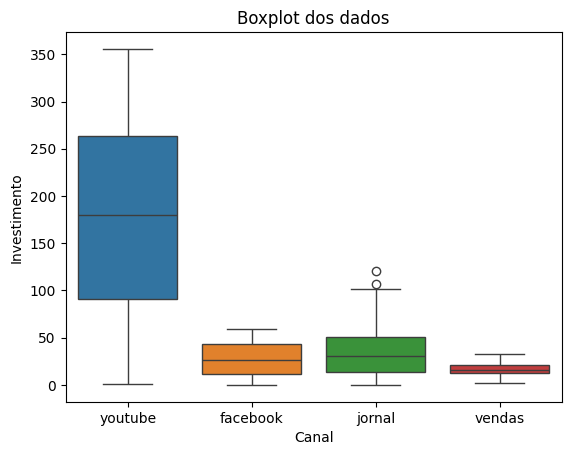

In [ ]:
# Verificando a distribuição dos dados de maneira gráfica.

sns.boxplot(df)
plt.xlabel('Canal')
plt.ylabel('Investimento')
plt.title('Boxplot dos dados')
plt.show()

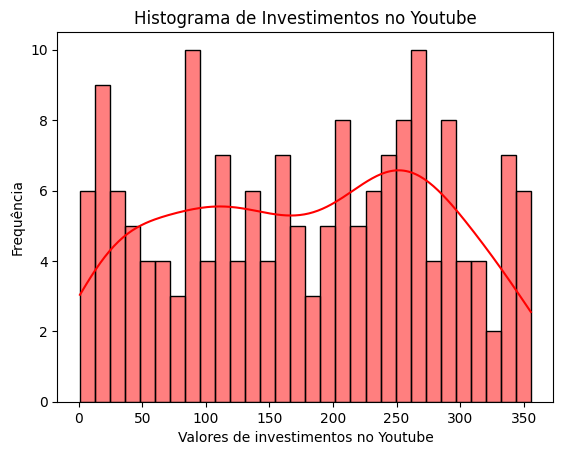

In [ ]:
# Verificando a distribuição da coluna YOUTUBE.
# Inseri a linha para facilitar a leitura do gráfico.

sns.histplot(df['youtube'], bins = 30, kde = True, color = 'red')
plt.title('Histograma de Investimentos no Youtube')
plt.xlabel('Valores de investimentos no Youtube')
plt.ylabel('Frequência')
plt.show()

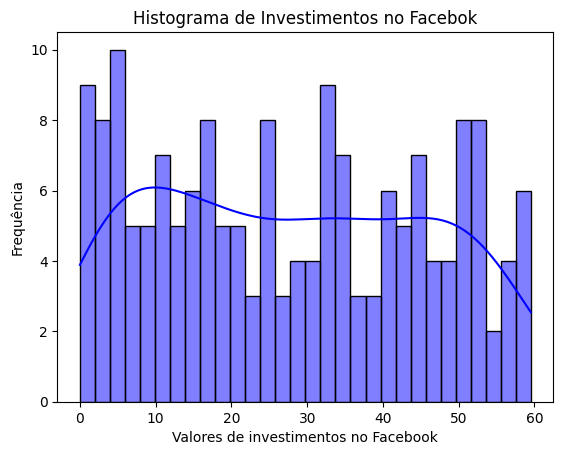

In [ ]:
# Verificando a distribuição da coluna FACEBOOK.
# Inseri a linha para facilitar a leitura do gráfico.

sns.histplot(df['facebook'], bins = 30, kde = True, color = 'blue')
plt.title('Histograma de Investimentos no Facebok')
plt.xlabel('Valores de investimentos no Facebook')
plt.ylabel('Frequência')
plt.show()

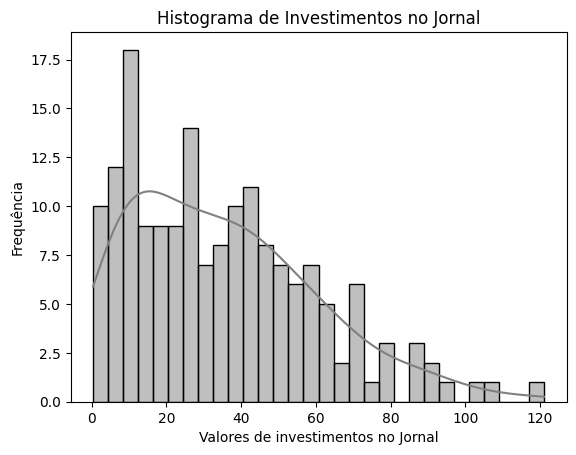

In [ ]:
# Verificando a distribuição da coluna JORNAL.
# Inseri a linha para facilitar a leitura do gráfico.

sns.histplot(df['jornal'], bins = 30, kde = True, color = 'grey')
plt.title('Histograma de Investimentos no Jornal')
plt.xlabel('Valores de investimentos no Jornal')
plt.ylabel('Frequência')
plt.show()

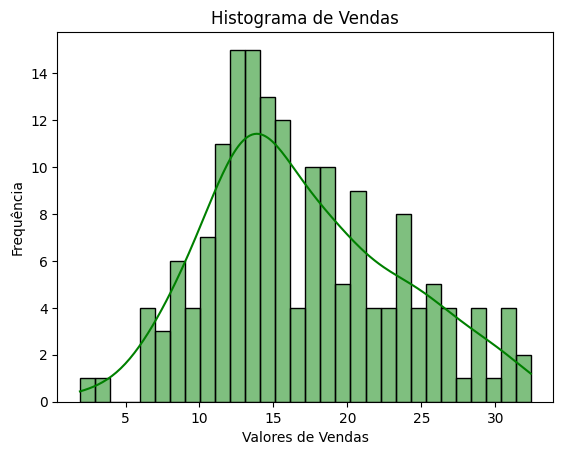

In [ ]:
# Verificando a distribuição da coluna VENDAS.
# Inseri a linha para facilitar a leitura do gráfico.

sns.histplot(df['vendas'], bins = 30, kde = True, color = 'green')
plt.title('Histograma de Vendas')
plt.xlabel('Valores de Vendas')
plt.ylabel('Frequência')
plt.show()

### ENTENDENDO A CORRELAÇÃO ENTRE OS DADOS

Utilizando as bibliotecas importadas, procurei entender as correlações entre os dados dentro do dataset.

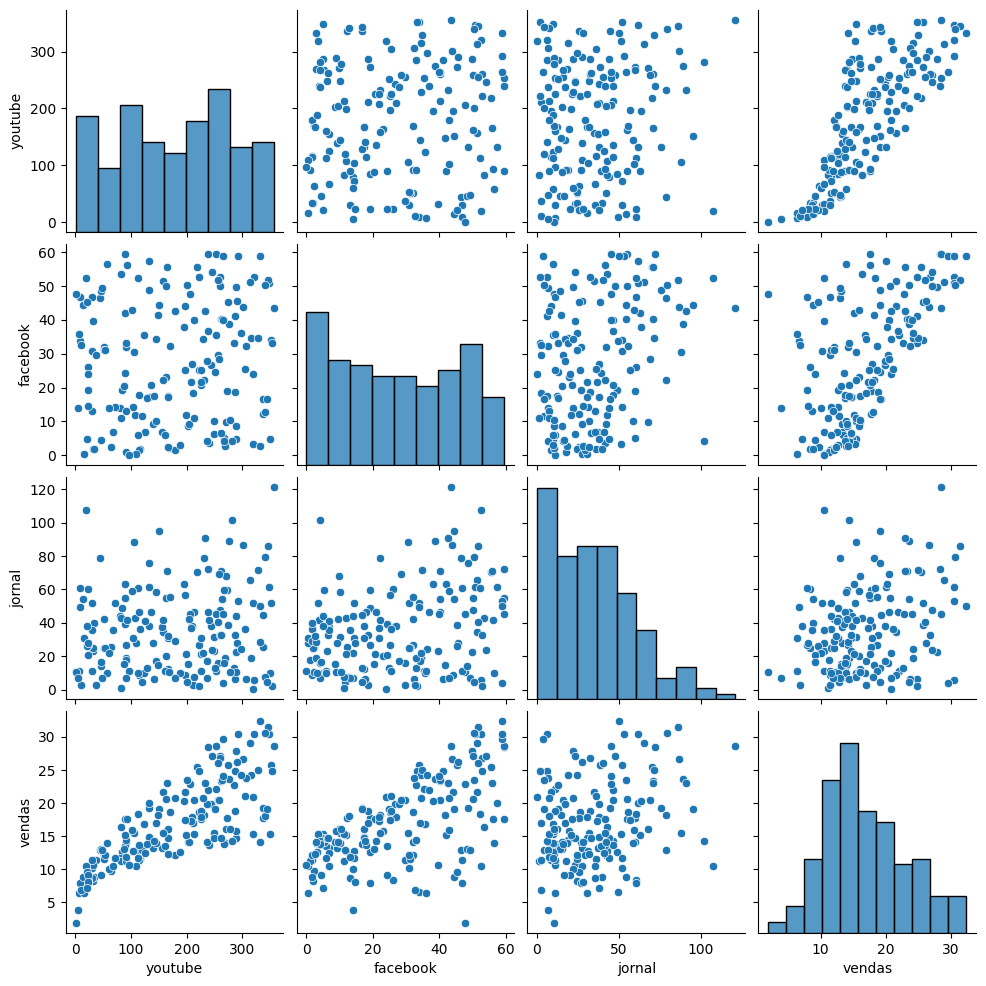

In [ ]:
# Verificando a correlação dos dados dentro do df por meio do pairplot.

sns.pairplot(df)

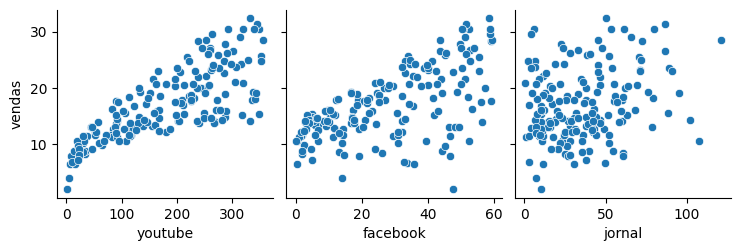

In [ ]:
# Verificando a correlação linear de vendas com o investimento em cada plataforma por meio do pairplot, evidenciando as vendas.

sns.pairplot(df, x_vars=['youtube', 'facebook', 'jornal'], y_vars='vendas');

In [ ]:
# Verificando a correlação entre as variáveis por meio do método .corr().

df.corr()

,youtube,facebook,jornal,vendas
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
jornal,0.110759,0.293425,1.000000,0.254987
vendas,0.782030,0.602918,0.254987,1.000000


<Axes: >

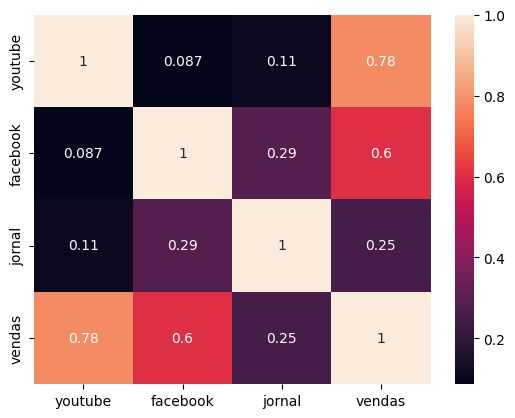

In [ ]:
# Verificando a correlação com o mapa de calor.
# Quanto mais próximod e 01, maior a correlação.
# Podemos verificar que o número de vendas, aumenta com o aumento de investimentos nas plataformas Youtube e Facebook.
# Entretanto, a correlação do investimento em jornais e o número de vendas, é baixo.

sns.heatmap(df.corr(), annot=True)

# DATA PREPARATION

Separei as variáveis X e Y para utilização nos modelos que regressão.

In [ ]:
# aqui, peguei o nome das colunas do nosso dataset.
df.columns

Index(['youtube', 'facebook', 'jornal', 'vendas'], dtype='object')

In [ ]:
# E defini o X e y que serão utilizados nos modelos.
X = df[['youtube', 'facebook', 'jornal']]
y = df['vendas']

#MODELING TECHNIQUES

Premissas:

As técnicas escolhidas trabalham apenas com variáveis numéricas!

### REGRESSÃO LINEAR

Linear Regression by Sklearn:
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

*Dataset split: Foi realizada a separação do dataset de treino e dataset de teste padrão, com 30% de massa para teste.*

<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split>

In [ ]:
# Importando a biblioteca SKLEARN para treinar o modelo de regressão.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Realizando o splt do dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
# Verificando o tamanho.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119,)
(52,)


In [ ]:
# Treinando o modelo

lm = LinearRegression().fit(X_train, y_train)

### REGRESSÃO POR VETORES DE SUPORTE

Support Vector Regression by Sklearn:
<https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html>

*Dataset split: Foi realizada a separação do dataset de treino e dataset de teste padrão, com 30% de massa para teste.*

<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split>

In [ ]:
# Importando a biblioteca SKLEARN para treinar o modelo de vetores de suporte.

from sklearn.svm import SVR

In [ ]:
# Já utilizando o split realizado para a regressão linear
# Treinando o modelo

svr = SVR().fit(X_train, y_train)

### ÁRVORE DE REGRESSÃO

Decision Tree Regression by XGBOOST:
<https://xgboost.readthedocs.io/en/stable/python/python_api.html>

*Dataset split: Foi realizada a separação do dataset de treino e dataset de teste padrão, com 30% de massa para teste.*

<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split>

In [ ]:
# Importando a biblioteca XGBOOST para treinar o modelo de árvore de regressão.

from xgboost import XGBRegressor

In [ ]:
# Já utilizando o split realizado para a regressão linear
# Treinando o modelo

treeXGB = XGBRegressor().fit(X_train, y_train)

# EVALUATION

Validação das métricas:

MSE = Erro quadrático médio
RMSE = Raiz do erro quadrático médio

Dessa forma, o modelo que realizar grandes erros de previsão, será penalizado.

<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html>

### REGRESSÃO LINEAR:

In [ ]:
# importei aqui as bibliotecas para que possamos validar a métrica escolhida para definir o melhor modelo.
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Defini aqui o Y da REGRESSÃO LINEAR.

y_predlm = lm.predict(X_test)

In [ ]:
# Defini aqui o MSE da REGRESSÃO LINEAR.

MSElm = mean_squared_error(y_test, y_predlm)

In [ ]:
# Defini aqui o RMSE da REGRESSÃO LINEAR.

RMSElm = np.sqrt(MSElm)

In [ ]:
# EVIDENCIEI AQUI O MSE E RMSE

print('MSE da Regressão Linear =', round(MSElm,4))
print('RMSE da Regressão Linear =', round(RMSElm,4))

MSE da Regressão Linear = 4.6994
RMSE da Regressão Linear = 2.1678


### REGRESSÃO POR VETORES DE SUPORTE:

In [ ]:
# Defini aqui o Y da REGRESSÃO POR VETORES DE SUPORTE.

y_predsvr = svr.predict(X_test)

In [ ]:
# Defini aqui o MSE da REGRESSÃO POR VETORES DE SUPORTE.

MSEsvr = mean_squared_error(y_test, y_predsvr)

In [ ]:
# Defini aqui o RMSE da REGRESSÃO POR VETORES DE SUPORTE.

RMSEsvr = np.sqrt(MSEsvr)

In [ ]:
# EVIDENCIEI AQUI O MSE E RMSE

print('MSE do SVR =', round(MSEsvr,4))
print('RMSE do SVR =', round(RMSEsvr,4))

MSE do SVR = 9.3045
RMSE do SVR = 3.0503


### ÁRVORE DE REGRESSÃO:

In [ ]:
# Defini aqui o Y da ÁRVORE DE REGRESSÃO.

y_predtree = treeXGB.predict(X_test)

In [ ]:
# Defini aqui o MSE da ÁRVORE DE REGRESSÃO.

MSEtree = mean_squared_error(y_test, y_predtree)

In [ ]:
# Defini aqui o RMSE da ÁRVORE DE REGRESSÃO.

RMSEtree = np.sqrt(MSEtree)

In [ ]:
# EVIDENCIEI AQUI O MSE E RMSE

print('MSE da Árvore de Regressão =', round(MSEtree,4))
print('RMSE da Árvore de Regressão =', round(RMSEtree,4))

MSE da Árvore de Regressão = 1.6327
RMSE da Árvore de Regressão = 1.2778


# RESULT (GRAPHICS)

Foi utilizado um gráfico de linha para evidenciar o modelo que melhor performou para predizer os valores de venda de acordo com o investimento.

### REGRESSÃO LINEAR:

In [ ]:
print('MSE da Regressão Linear =', round(MSElm,4))
print('RMSE da Regressão Linear =', round(RMSElm,4))

MSE da Regressão Linear = 4.6994
RMSE da Regressão Linear = 2.1678


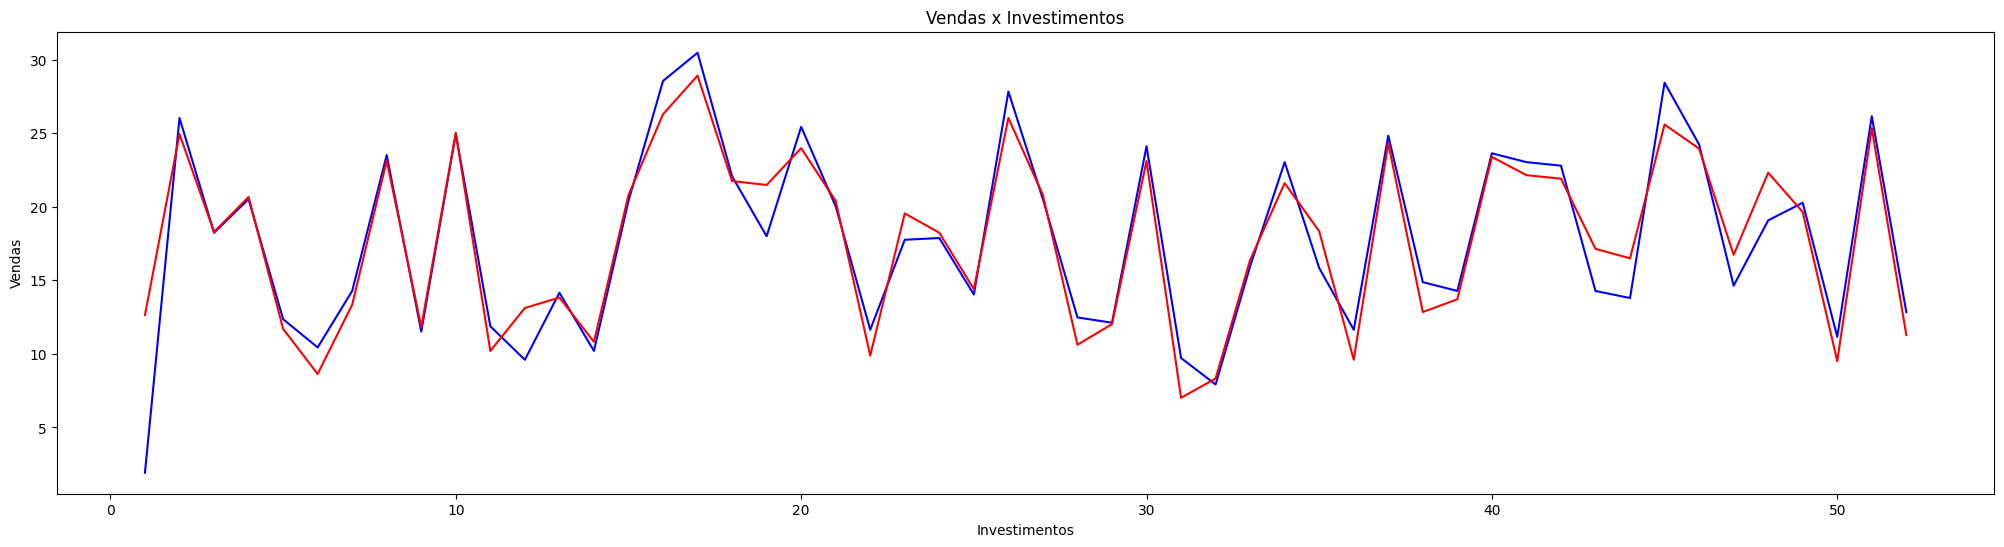

In [ ]:
import matplotlib.pyplot as plt
A = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize=(25, 6))
plt.plot(A, y_test, color = 'blue');
plt.plot(A, y_predlm, color = 'red');
plt.xlabel('Investimentos');
plt.ylabel('Vendas');
plt.title('Vendas x Investimentos');

### REGRESSÃO POR VETORES DE SUPORTE:

In [ ]:
print('MSE do SVR =', round(MSEsvr,4))
print('RMSE do SVR =', round(RMSEsvr,4))

MSE do SVR = 9.3045
RMSE do SVR = 3.0503


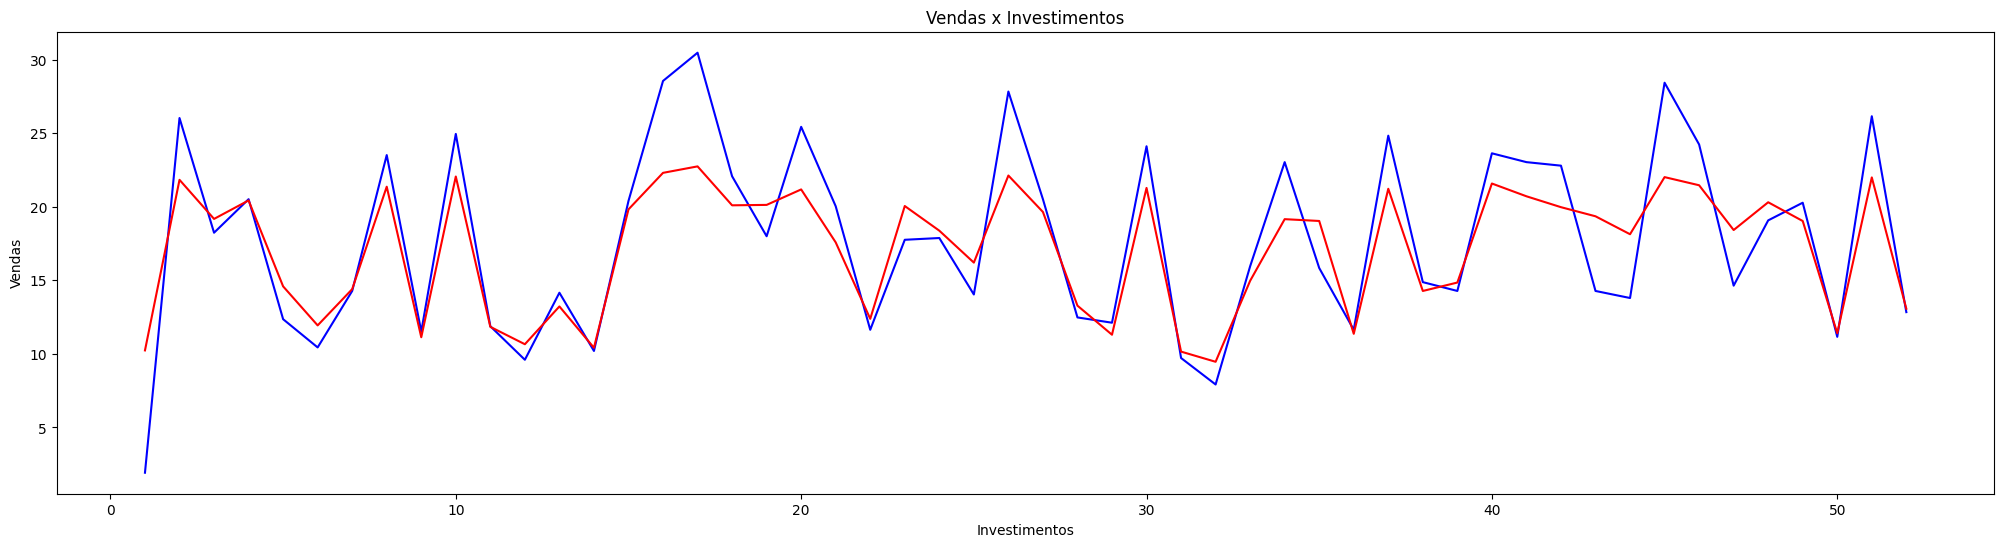

In [ ]:
B = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize=(25, 6))
plt.plot(B, y_test, color = 'blue');
plt.plot(B, y_predsvr, color = 'red');
plt.xlabel('Investimentos');
plt.ylabel('Vendas');
plt.title('Vendas x Investimentos');

### ÁRVORE DE REGRESSÃO:

In [ ]:
print('MSE da Árvore de Regressão =', round(MSEtree,4))
print('RMSE da Árvore de Regressão =', round(RMSEtree,4))

MSE da Árvore de Regressão = 1.6327
RMSE da Árvore de Regressão = 1.2778


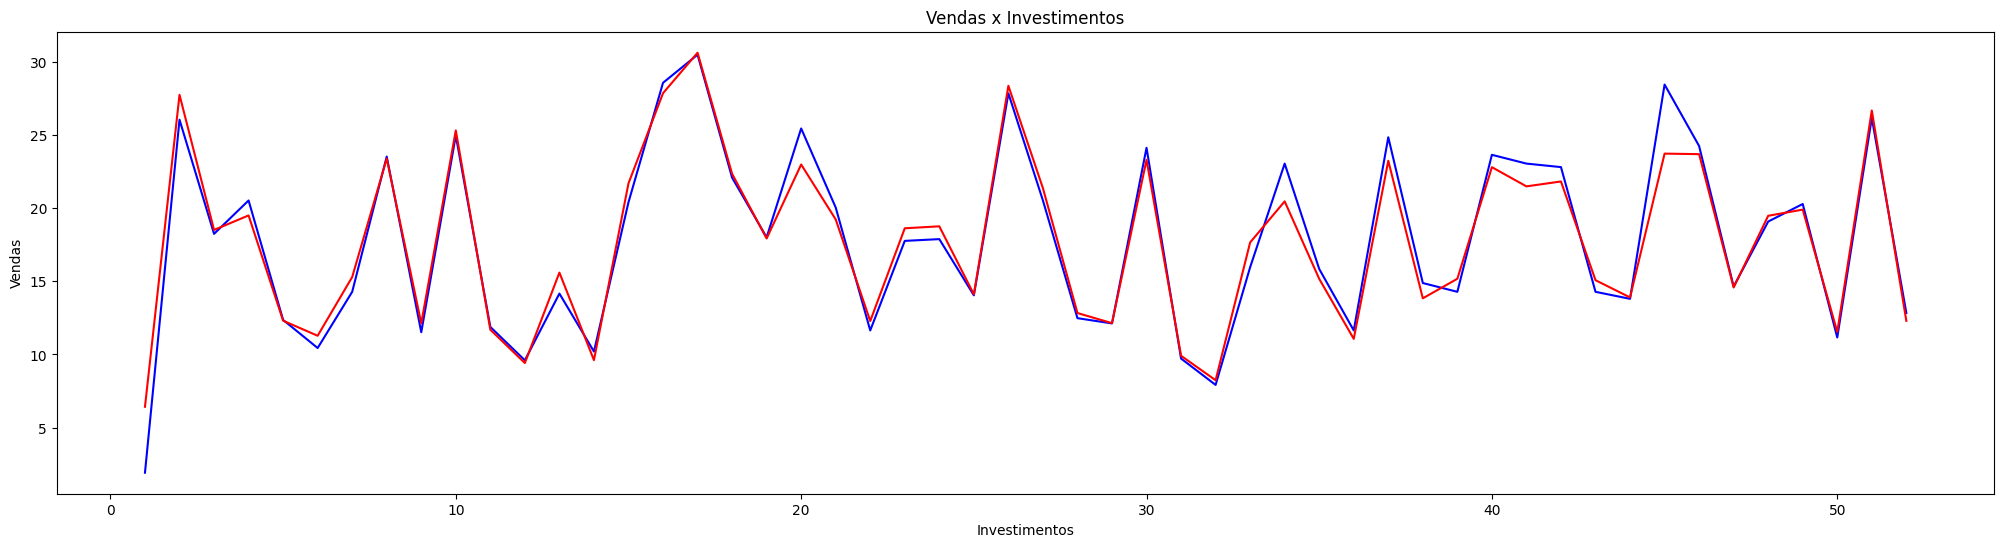

In [ ]:
C = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize=(25, 6))
plt.plot(C, y_test, color = 'blue');
plt.plot(C, y_predtree, color = 'red');
plt.xlabel('Investimentos');
plt.ylabel('Vendas');
plt.title('Vendas x Investimentos');

# PREDIÇÃO DE VENDAS

Com base nos resultados, vimos que a Árvore de Regressão foi o modelo com a melhor performance para o nosso problema, dessa forma, utilizaremos ele para realizar a predição de vendas de acordo com mo investimento do nosso cliente.

In [ ]:
# Pedindo ao usuário para inserir o valor de investimento.
# Inserindo os dados inputados pelo usuário em uma entrada "lista" para a predição.
# Calculando a previsão de acordo com a ÁRVORE DE REGRESSÃO XGBOOST.

youtube = float(input('Digite o valor de investimento em Youtube: R$ '))
facebook = float(input('Digite o valor de investimento em Facebook: R$ '))
jornal = float(input('Digite o valor de investimento em Jornal: R$ '))

entrada = [[youtube, facebook, jornal]]
previsao = treeXGB.predict(entrada)

Digite o valor de investimento em Youtube: R$ 150.50
Digite o valor de investimento em Facebook: R$ 75.50
Digite o valor de investimento em Jornal: R$ 50.00


In [ ]:
# Mostrando ao usuário a previsão de vendas, com no máximo 02 casas decimais.

print('Previsão de Vendas: ', np.round(previsao.item(), 2))

Previsão de Vendas:  19.75
